In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("ECommerce_consumer behaviour.csv")

In [4]:
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [5]:
data.shape

(2019501, 12)

In [6]:
data.order_id.nunique()

200000

In [7]:
data['order_dow'].value_counts()

0    391831
1    349236
6    280751
5    262157
2    261912
3    238730
4    234884
Name: order_dow, dtype: int64

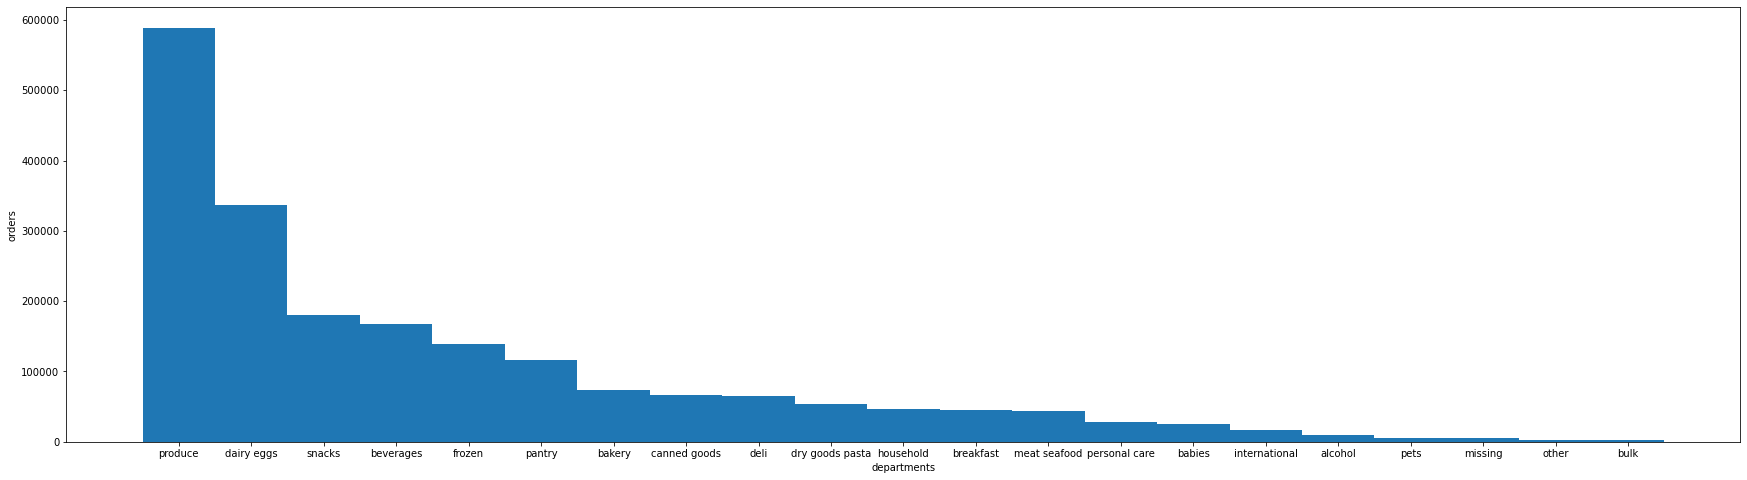

In [8]:
fig = plt.figure(figsize = (30, 8))
plt.bar(data['department'].value_counts().index,data['department'].value_counts().values,width = 1)
plt.xlabel('departments')
plt.ylabel('orders')
plt.show()

## The above bar chart shows us the number of products sold for each department so we can use this data to figure out the departments for which the quantity of products can be bought in bulk

## The data doesn't consist of order dates so we cannot infer the busiest weeks or months from this data but we can infer a day of the week and time for planned downtime or maintainence

In [9]:
hours_of_day = data['order_hour_of_day'].value_counts().sort_index().index
sales_by_hour = data['order_hour_of_day'].value_counts().sort_index().values

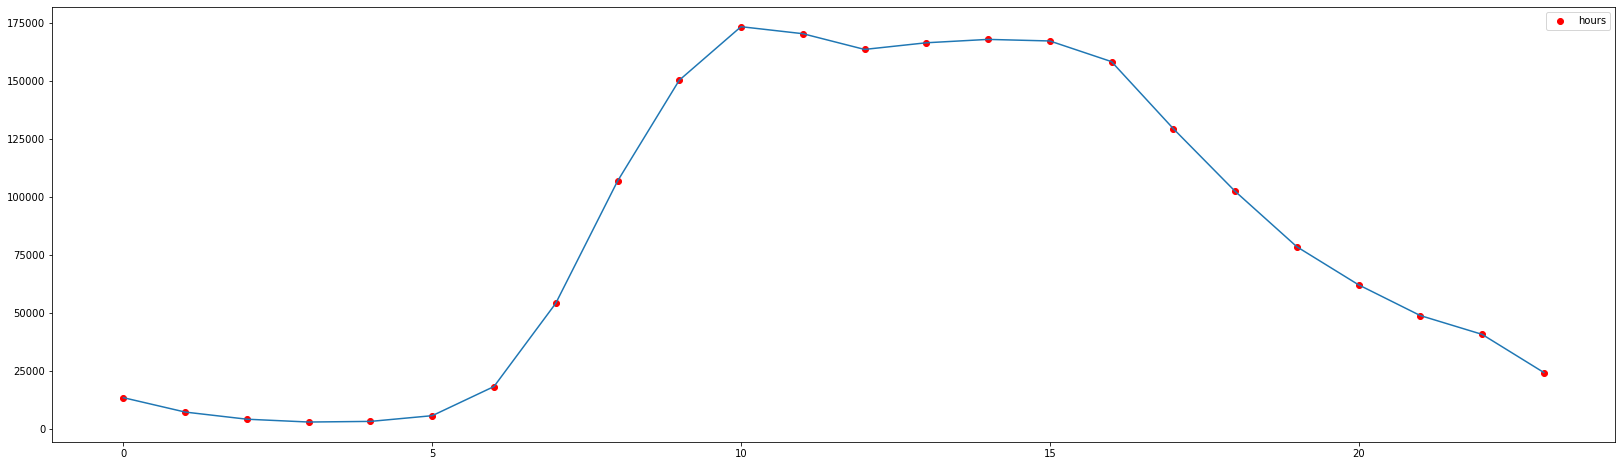

In [10]:
fig = plt.figure(figsize =(28,8))
plt.plot(hours_of_day,sales_by_hour)
plt.scatter(hours_of_day,sales_by_hour,c = 'r',label = "hours")
plt.legend()
plt.show()

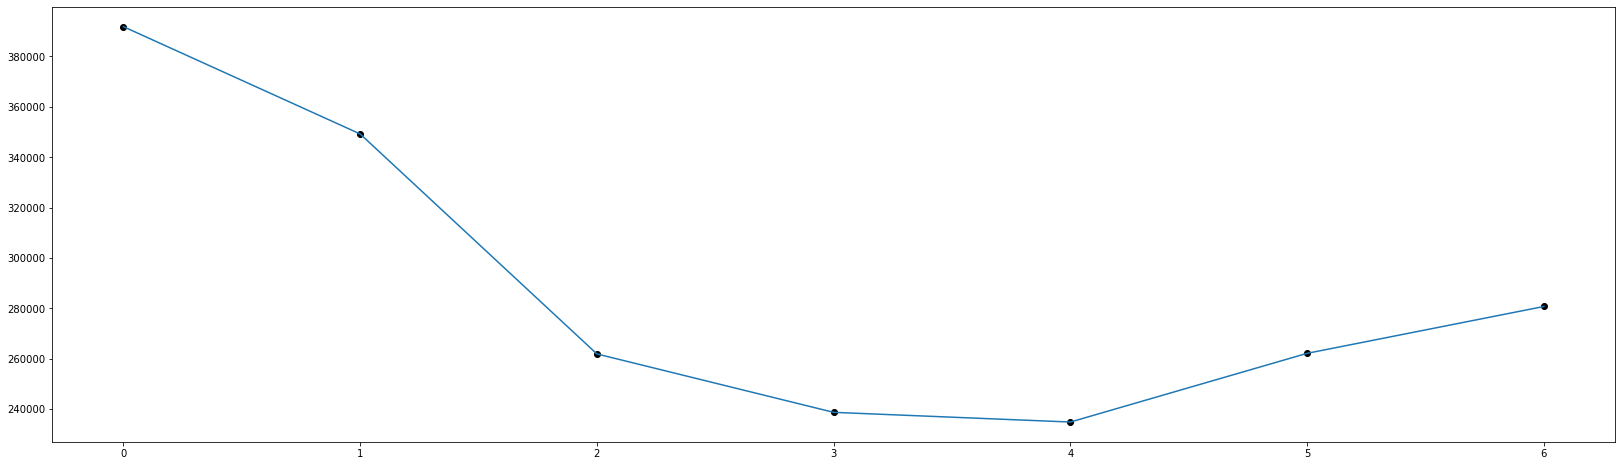

In [11]:
days_of_week = data['order_dow'].value_counts().sort_index().index
sales_by_day = data['order_dow'].value_counts().sort_index().values
fig = plt.figure(figsize =(28,8))
plt.plot(days_of_week,sales_by_day)
plt.scatter(days_of_week,sales_by_day,c = 'black')
plt.show()

## The above two line charts show us the time and day of a week that can be used for a planned downtime so that it affects the least users.
## As we can observe that on an average the sales are least on the 5th day of any week and between 0300 and 0400 hrs the least orders are being placed

In [59]:
data.groupby(by = ['product_id','department']).count()

,,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,department_id,product_name
product_id,department,,,,,,,,,,
1,deli,4384,4384,4384,4384,4384,4106,4384,4384,4384,4384
2,dairy eggs,5102,5102,5102,5102,5102,4803,5102,5102,5102,5102
3,snacks,28639,28639,28639,28639,28639,26979,28639,28639,28639,28639
4,dry goods pasta,12651,12651,12651,12651,12651,11848,12651,12651,12651,12651
5,pantry,3836,3836,3836,3836,3836,3560,3836,3836,3836,3836
...,...,...,...,...,...,...,...,...,...,...,...
130,breakfast,9820,9820,9820,9820,9820,9204,9820,9820,9820,9820
131,dry goods pasta,16414,16414,16414,16414,16414,15328,16414,16414,16414,16414
132,personal care,387,387,387,387,387,354,387,387,387,387


In [60]:
data.groupby(by = ['product_id']).count()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,department_id,department,product_name
product_id,,,,,,,,,,,
1,4384,4384,4384,4384,4384,4106,4384,4384,4384,4384,4384
2,5102,5102,5102,5102,5102,4803,5102,5102,5102,5102,5102
3,28639,28639,28639,28639,28639,26979,28639,28639,28639,28639,28639
4,12651,12651,12651,12651,12651,11848,12651,12651,12651,12651,12651
5,3836,3836,3836,3836,3836,3560,3836,3836,3836,3836,3836
...,...,...,...,...,...,...,...,...,...,...,...
130,9820,9820,9820,9820,9820,9204,9820,9820,9820,9820,9820
131,16414,16414,16414,16414,16414,15328,16414,16414,16414,16414,16414
132,387,387,387,387,387,354,387,387,387,387,387


## We can see that each product is associated with only one department as when the data is grouped by products or by the products and departments the number of rows are same. 